<a href="https://colab.research.google.com/github/Komalrawatt/Parking_Detection/blob/main/Car_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np # linear algebra #rgb values for images exist in a np array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import PIL # Importing Image class from PIL module
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
#import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [8]:
data_path = "drive/MyDrive/car parking/data/data"
Categories = ["Free", "Full"]
img_size = 150

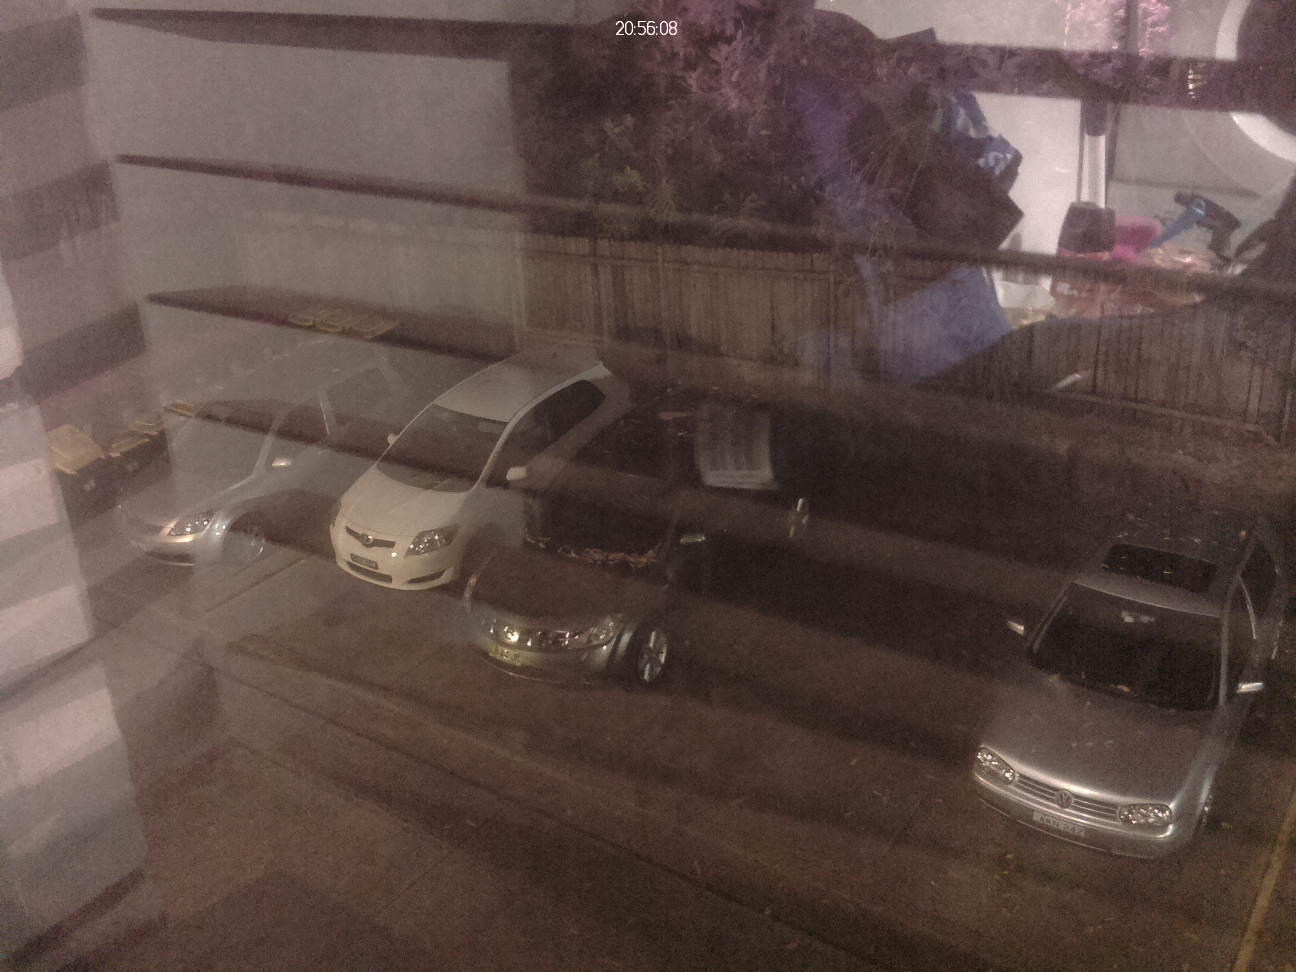

In [9]:
# Let's view as image
from IPython.display import Image
Image("drive/MyDrive/car parking/data/data/Free/img_126205602.jpg")

In [10]:
data = []

def create_data():
    for category in Categories:
        path = os.path.join(data_path,category)
        class_num = Categories.index(category)
        print(path) #lepath to each category file
        for img in os.listdir(path):
            print(img) #path to each image in the category files
            img_arr = cv2.imread(os.path.join(path,img))
            new_img_arr = cv2.resize(img_arr,(img_size,img_size))
            data.append([new_img_arr,class_num])
create_data()

drive/MyDrive/car parking/data/data/Free
img_1006142558.jpg
img_1006143557.jpg
img_1006140558.jpg
img_1006142057.jpg
img_1006143058.jpg
img_1006144558.jpg
img_1006141058.jpg
img_1006151557.jpg
img_1006145558.jpg
img_1006152559.jpg
img_1006145058.jpg
img_1006151058.jpg
img_1006150058.jpg
img_1006152058.jpg
img_1006150557.jpg
img_1006155057.jpg
img_1006161058.jpg
img_1006160058.jpg
img_1006153058.jpg
img_1006153557.jpg
img_1006160558.jpg
img_1006154558.jpg
img_1006154057.jpg
img_1006155558.jpg
img_1006163558.jpg
img_1006162058.jpg
img_1006164058.jpg
img_1006161558.jpg
img_1006165558.jpg
img_1006165058.jpg
img_1006164557.jpg
img_1006162558.jpg
img_1006163057.jpg
img_1007083559.jpg
img_1007084058.jpg
img_1007084558.jpg
img_1006170558.jpg
img_1007083058.jpg
img_1007082558.jpg
img_1006171058.jpg
img_1007085558.jpg
img_1007085058.jpg
img_1007092058.jpg
img_1007102557.jpg
img_1007091058.jpg
img_1007092558.jpg
img_1007090058.jpg
img_1007103057.jpg
img_1007091558.jpg
img_1007103558.jpg
img_10070

In [11]:
print(len(data))

3262


In [12]:
X= [] #store images
Y= [] #store lables["free","full"]

In [13]:
for features, labels in data:
    X.append(features)
    Y.append(labels)

array([[[ 71,  59,  72],
        [ 71,  61,  71],
        [ 91,  82,  95],
        ...,
        [104,  88, 106],
        [114, 100, 117],
        [107,  91, 108]],

       [[ 73,  62,  74],
        [ 71,  61,  73],
        [ 94,  85,  99],
        ...,
        [111,  95, 113],
        [ 99,  83, 101],
        [ 96,  82, 100]],

       [[ 70,  60,  74],
        [ 70,  58,  72],
        [ 98,  89, 104],
        ...,
        [128, 112, 134],
        [119, 105, 123],
        [108,  93, 111]],

       ...,

       [[ 84,  76,  82],
        [117, 108, 111],
        [121, 110, 114],
        ...,
        [123, 105, 104],
        [117, 100,  98],
        [115,  97,  96]],

       [[110, 104, 107],
        [115, 106, 109],
        [120, 109, 112],
        ...,
        [240, 242, 240],
        [239, 235, 230],
        [151, 129, 122]],

       [[112, 105, 108],
        [117, 110, 113],
        [114, 105, 108],
        ...,
        [175, 150, 149],
        [157, 139, 138],
        [125, 111, 108]]], dtype=uint8)
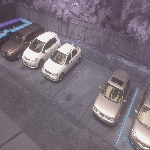

In [14]:
X[1]

In [15]:
# separate data
#training data - 80% of data
#testing data - 20% of data
#random_state is used to get the same split everytime. If we do not fix it, it would result in a different split everytme the code is run
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [16]:
def process_images(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image

In [17]:
x_train = process_images(x_train)
x_test = process_images(x_test)

In [18]:
x_train = np.array(x_train).reshape(-1, 227, 227, 3)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 227, 227, 3)
y_test = np.array(y_test)

In [19]:
x_validate = x_train[:520]
x_train = x_train[521:]
y_validate = y_train[:520]
y_train = y_train[521:]

In [20]:
model = keras.models.Sequential([
    keras.Input(shape=(227, 227, 3)),

    keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(256, (5,5), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(384, (3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(384, (3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, (3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,327,818 (222.50 MB)

 Trainable params: 58,325,066 (222.49 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [22]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",mode ="min", patience = 5,restore_best_weights = True)

In [23]:
# fit the model
history = model.fit(x_train,y_train, epochs=50, validation_data = (x_validate,y_validate),callbacks =[earlystopping])

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 255ms/step - accuracy: 0.5850 - loss: 23.5343 - val_accuracy: 0.3038 - val_loss: 55.7364
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7454 - loss: 0.9373 - val_accuracy: 0.7115 - val_loss: 1.5662
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8430 - loss: 0.4546 - val_accuracy: 0.8750 - val_loss: 0.4809
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8900 - loss: 0.3225 - val_accuracy: 0.8942 - val_loss: 0.3896
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.8881 - loss: 0.3895 - val_accuracy: 0.9019 - val_loss: 0.3751
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9025 - loss: 0.2763 - val_accuracy: 0.9135 - val_loss: 0.2599
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9407 - loss: 0.1732 - val_accuracy: 0.9231 - val_loss: 0.2235
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9395 - loss: 0.2358 - val_accuracy: 0.8846

In [24]:
model.evaluate(x_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9851 - loss: 0.0585


[0.07617589086294174, 0.9831546545028687]

In [25]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


In [26]:
#Storing properly classified and misclassified indexes
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(y_test[i] == pred_digits[i]):
        prop_class.append(i)
    else:
        mis_class.append(i)

print("Properly predicted: " + str(len(prop_class)))
print("Misclassified: " + str(len(mis_class)))


Properly predicted: 642
Misclassified: 11


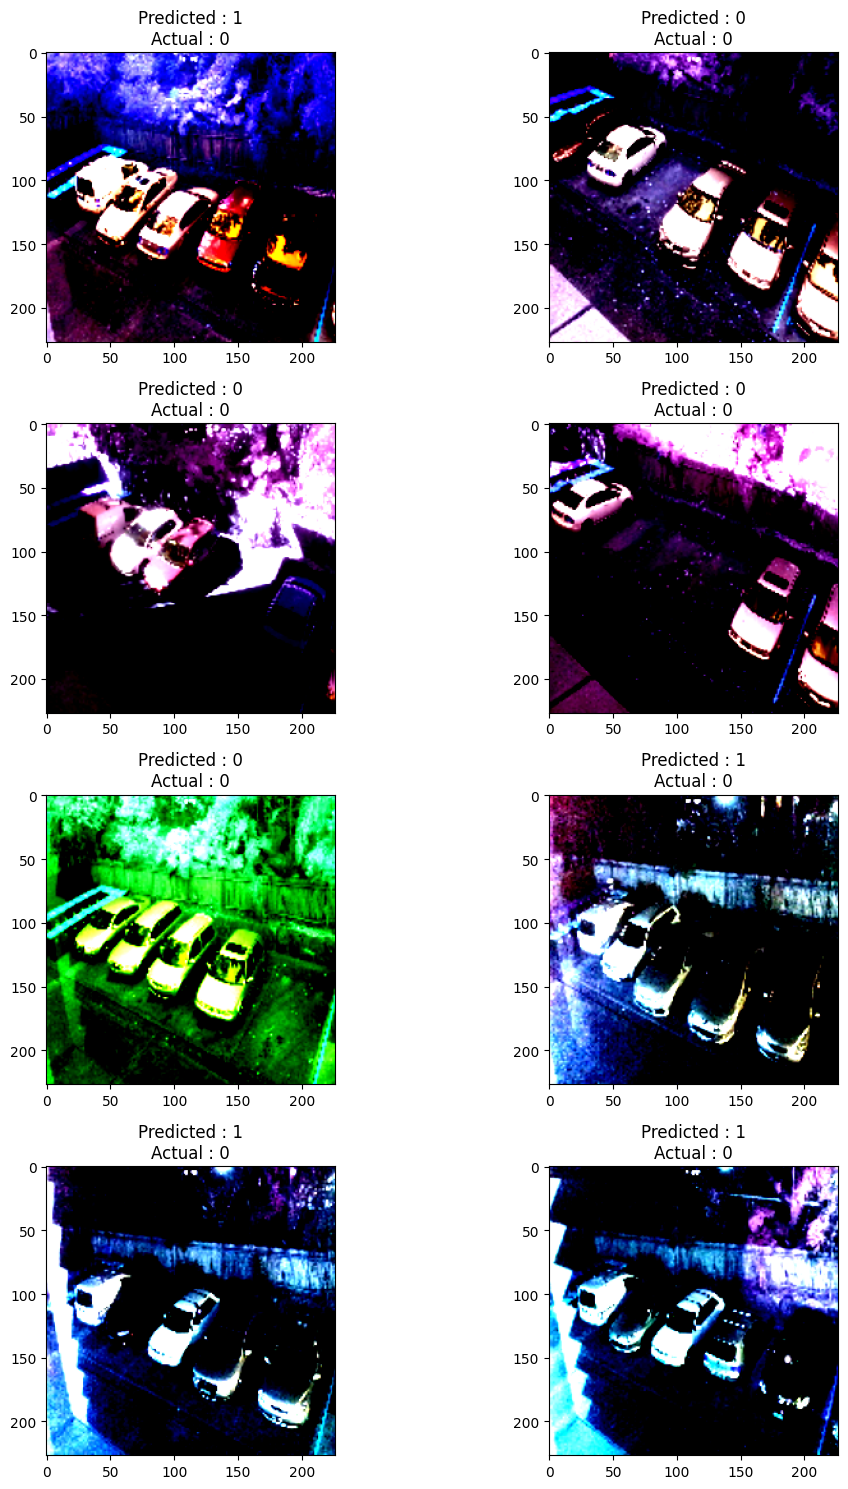

In [27]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(pred_digits[prop_class[count]])+"\n"+"Actual : "+str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1

In [28]:
test_data_path = "drive/MyDrive/car parking/Own-data" #Loading image from url
own_img_data = []
own_img_np=[]
for own_test_img in os.listdir(test_data_path):
   # print(own_test_img)
    own_img_data.append(os.path.join(test_data_path,own_test_img))
    test_img_arr = cv2.imread(os.path.join(test_data_path,own_test_img))
    if test_img_arr is None:
        continue
    test_new_img_arr = cv2.resize(test_img_arr,(img_size,img_size))
    test_img = process_images(test_new_img_arr)
    test_img= tf.image.per_image_standardization(test_img) #added
    test_img = np.array(test_img).reshape(-1, 227, 227, 3) #converting rgb values into np aaray
    own_img_np.append(test_img)

In [29]:
own_predictions=[]
for test_img in own_img_np:
        own_pred=model.predict(test_img)
        own_pred_digits=np.argmax(own_pred,axis=1)
        own_predictions.append(float(own_pred_digits))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/tmp/ipython-input-3264370368.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  own_predictions.append(float(own_pred_digits))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [30]:
own_results = []
for pred in own_predictions:
    if(pred == 0):
        own_results.append("free")
    else:
        own_results.append("full")

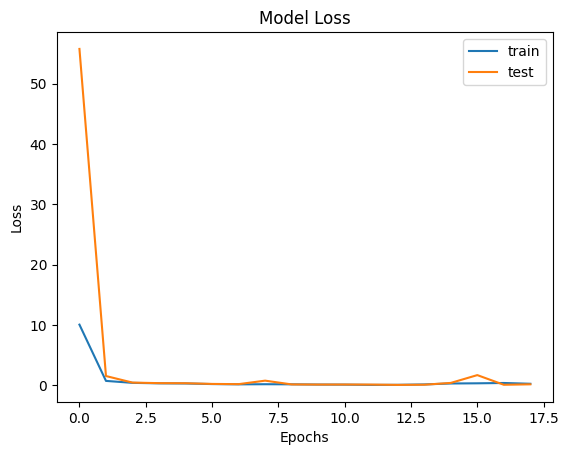

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

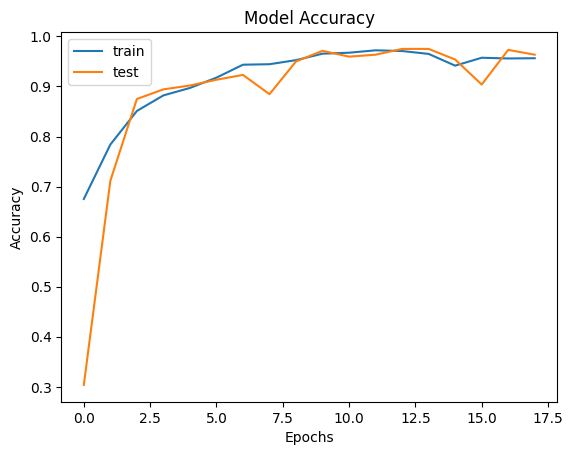

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [33]:
test_data_path = "drive/MyDrive/car parking/Own-data" #Loading image from url
owu_img_data = []
owu_img_np=[]
for owu_test_img in os.listdir(test_data_path):
    owu_img_data.append(os.path.join(test_data_path,owu_test_img))
    test_img_arr = cv2.imread(os.path.join(test_data_path,owu_test_img))
    test_new_img_arr = cv2.resize(test_img_arr,(img_size,img_size))
    test_img = process_images(test_new_img_arr)
    test_img= tf.image.per_image_standardization(test_img) #added
    test_img = np.array(test_img).reshape(-1, 227, 227, 3) #converting rgb values into np aaray
    owu_img_np.append(test_img)

In [34]:
owu_predictions=[]
for test_img in owu_img_np:
        owu_pred=model.predict(test_img)
        owu_pred_digits=np.argmax(owu_pred,axis=1)
        owu_predictions.append(float(owu_pred_digits))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/tmp/ipython-input-562782642.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  owu_predictions.append(float(owu_pred_digits))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [35]:
owu_results = []
for pred in owu_predictions:
    if(pred == 0):
        owu_results.append("free")
    else:
        owu_results.append("full")

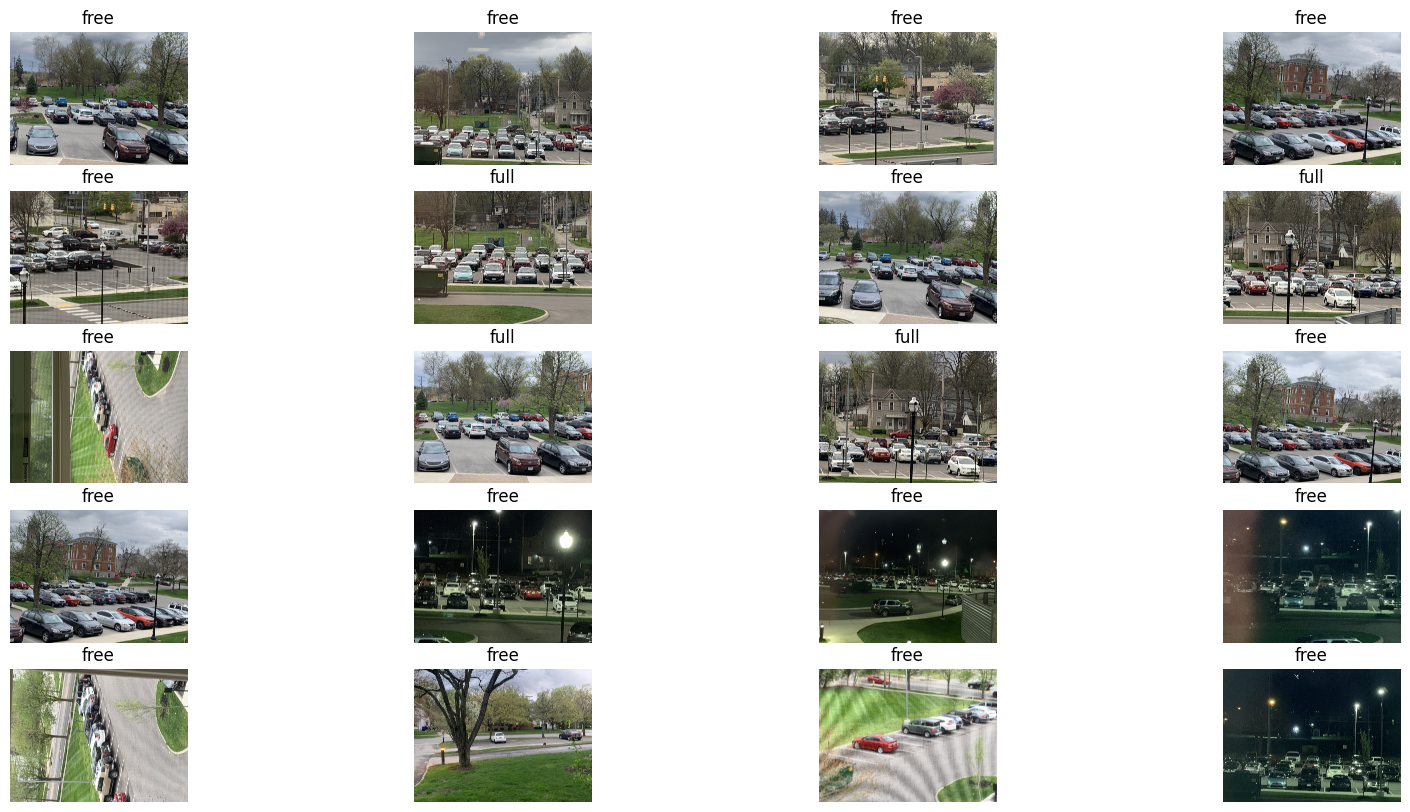

In [36]:
# create figure
fig = plt.figure(figsize=(20, 10))
k=0
for test_img in owu_img_data:
    k = k+1
    fig.add_subplot(5,4,k)
    plt.imshow(imread(test_img))
    plt.axis('off')
    plt.title(owu_results[owu_img_data.index(test_img)])
plt.show()

In [37]:
tf.keras.models.save_model(model, "drive/MyDrive/car parking/model.keras")


In [38]:
!pip install streamlit pyngrok pybase64 django-model-utils utils --quiet



In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%%writefile car.py
import streamlit as st
import cv2
import tensorflow as tf
import numpy as np
import base64

st.set_page_config(page_title="YMCA Car Parking", page_icon="🚗", layout="wide")

@st.cache_resource
def load_model():
    return tf.keras.models.load_model('/content/drive/MyDrive/car parking/model.keras')

model = load_model()

def process_images(image):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (227, 227))
    return image

def predict_parking_occupancy(image):
    img = process_images(image)
    img = np.array(img).reshape(-1, 227, 227, 3)
    prediction = model.predict(img)
    return "Full" if prediction[0][0] < 0.5 else "Free"

st.markdown(
    """
    <h1 style='text-align:center;'>J.C. Bose University of Science & Technology, YMCA</h1>
    <h2 style='text-align:center;'>🚗 Car Parking Occupancy Prediction</h2>
    """,
    unsafe_allow_html=True
)


uploaded_file = st.file_uploader("Upload parking area image:", type=['jpg', 'png'])

if uploaded_file:
    image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), cv2.IMREAD_COLOR)
    st.image(image, channels='BGR')

    status = predict_parking_occupancy(image)

    st.markdown(f"""
        <h2 style='text-align:center; color:white; background:green; padding:15px; border-radius:10px;'>
        Parking Status: {status}
        </h2>
    """, unsafe_allow_html=True)


Overwriting car.py


In [41]:
!pkill -f streamlit
!pkill -f ngrok


In [42]:
import subprocess

# run Streamlit in background
subprocess.Popen(["streamlit", "run", "car.py", "--server.port=8501", "--server.address=0.0.0.0"])


<Popen: returncode: None args: ['streamlit', 'run', 'car.py', '--server.port...>

In [43]:
import time
from pyngrok import ngrok
ngrok.set_auth_token("35t4UuPH79bPvOVCCJhp74dD4lY_7io9AD2k8Qyt6t4kL9CVd")

time.sleep(10)
# connect to streamlit port
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://lavenia-unportioned-brittany.ngrok-free.dev" -> "http://localhost:8501">

In [1]:
!git config --global user.name "Komal Rawat"
!git config --global user.email "komalrawat16012003@gmail.com"
